In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical

def load_data(dataset='mnist'):
    if dataset == 'mnist':
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
    else:
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

    # Normalize the data
    X_train, X_test = X_train / 255.0, X_test / 255.0
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    return X_train, y_train, X_test, y_test

# Load MNIST dataset
X_train, y_train, X_test, y_test = load_data('mnist')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras import layers, models

def build_model(architecture='simple', activation='relu', regularization=None):
    model = models.Sequential()

    # Input Layer (Flatten the image from 28x28 to a 784 vector)
    model.add(layers.Flatten(input_shape=(28, 28, 1)))

    # Hidden layers (Vary the number of layers and neurons)
    if architecture == 'simple':
        model.add(layers.Dense(128, activation=activation))
    elif architecture == 'deep':
        model.add(layers.Dense(256, activation=activation))
        model.add(layers.Dense(128, activation=activation))
    elif architecture == 'complex':
        model.add(layers.Dense(512, activation=activation))
        model.add(layers.Dense(256, activation=activation))
        model.add(layers.Dense(128, activation=activation))

    # Regularization
    if regularization == 'dropout':
        model.add(layers.Dropout(0.3))
    elif regularization == 'batch_norm':
        model.add(layers.BatchNormalization())

    # Output Layer (Softmax for classification)
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
def train_model(X_train, y_train, X_test, y_test, architecture='simple', activation='relu', regularization=None, epochs=10, batch_size=64):
    model = build_model(architecture, activation, regularization)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_acc}")

    return history, model

# Train the model
history, model = train_model(X_train, y_train, X_test, y_test, architecture='deep', activation='relu', regularization='dropout', epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8543 - loss: 0.4861 - val_accuracy: 0.9583 - val_loss: 0.1261
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9643 - loss: 0.1195 - val_accuracy: 0.9739 - val_loss: 0.0804
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9773 - loss: 0.0739 - val_accuracy: 0.9776 - val_loss: 0.0748
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9822 - loss: 0.0582 - val_accuracy: 0.9765 - val_loss: 0.0754
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9864 - loss: 0.0449 - val_accuracy: 0.9793 - val_loss: 0.0720
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9892 - loss: 0.0356 - val_accuracy: 0.9776 - val_loss: 0.0729
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9902 - loss: 0.0303 - val_accuracy: 0.9787 - val_loss: 0.0774
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0234 - val_accuracy: 0.

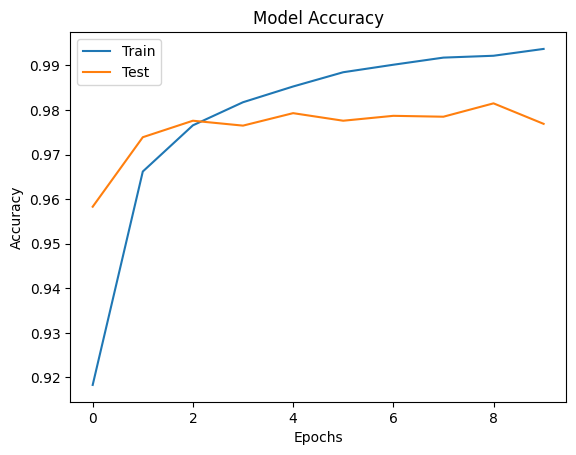

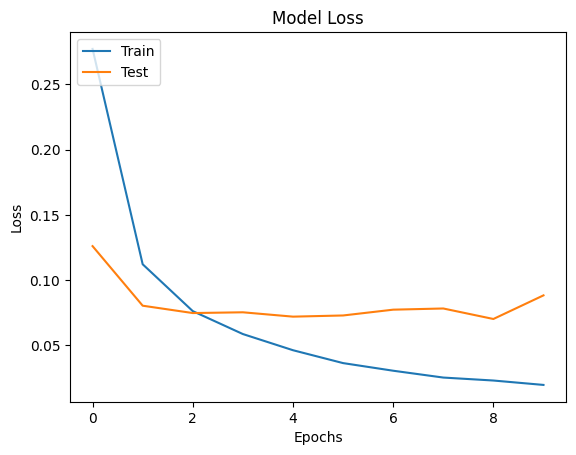

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Plot metrics
plot_metrics(history)


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8550 - loss: 0.4815 - val_accuracy: 0.9633 - val_loss: 0.1180
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9652 - loss: 0.1180 - val_accuracy: 0.9745 - val_loss: 0.0798
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9784 - loss: 0.0705 - val_accuracy: 0.9772 - val_loss: 0.0729
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9834 - loss: 0.0536 - val_accuracy: 0.9799 - val_loss: 0.0659
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9864 - loss: 0.0422 - val_accuracy: 0.9786 - val_loss: 0.0728
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9896 - loss: 0.0330 - val_accuracy: 0.9791 - val_loss: 0.0720
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9905 - loss: 0.0294 - val_accuracy: 0.9803 - val_loss: 0.0690
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9921 - loss: 0.0226 - val_accuracy: 0.

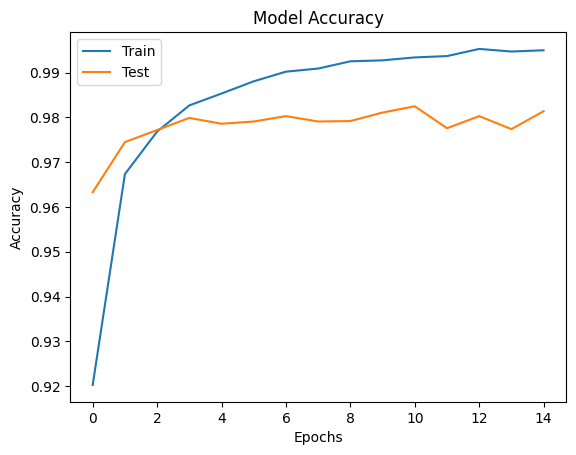

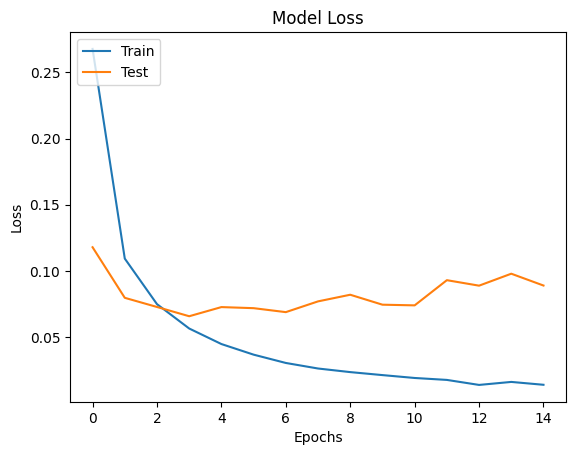

In [ ]:
def experiment(dataset='mnist', architecture='simple', activation='relu', regularization=None, epochs=10, batch_size=64):
    # Load data
    X_train, y_train, X_test, y_test = load_data(dataset)

    # Train model
    history, model = train_model(X_train, y_train, X_test, y_test, architecture, activation, regularization, epochs, batch_size)

    # Plot metrics
    plot_metrics(history)

# Experiment with different configurations
experiment('mnist', architecture='deep', activation='relu', regularization='dropout', epochs=15)
